# Popular Data Science Questions

Our goal in this project is to use Data Science Stack Exchange to determine what content should a data science education company create, based on interest by subject.

## Stack Exchange 

__What kind of questions are welcome on this site?__

On DSSE's help center's section on questions , we can read that we should:

* Avoid subjective questions.
* Ask practical questions about Data Science — there are adequate sites for theoretical questions.
* Ask specific questions.
* Make questions relevant to others.

All of these characteristics, if employed, should be helpful attributes to our goal.

In the help center we also learned that there are other two sites that are relevant:
* Open Data (Dataset requests)
* Computational Science (Software packages and algorithms in applied mathematics)

__What, other than questions, does DSSE's home subdivide into?__

On the home page we can see that we have four sections:
* Questions — a list of all questions asked;
* Tags — a list of tags (keywords or labels that categorize questions);
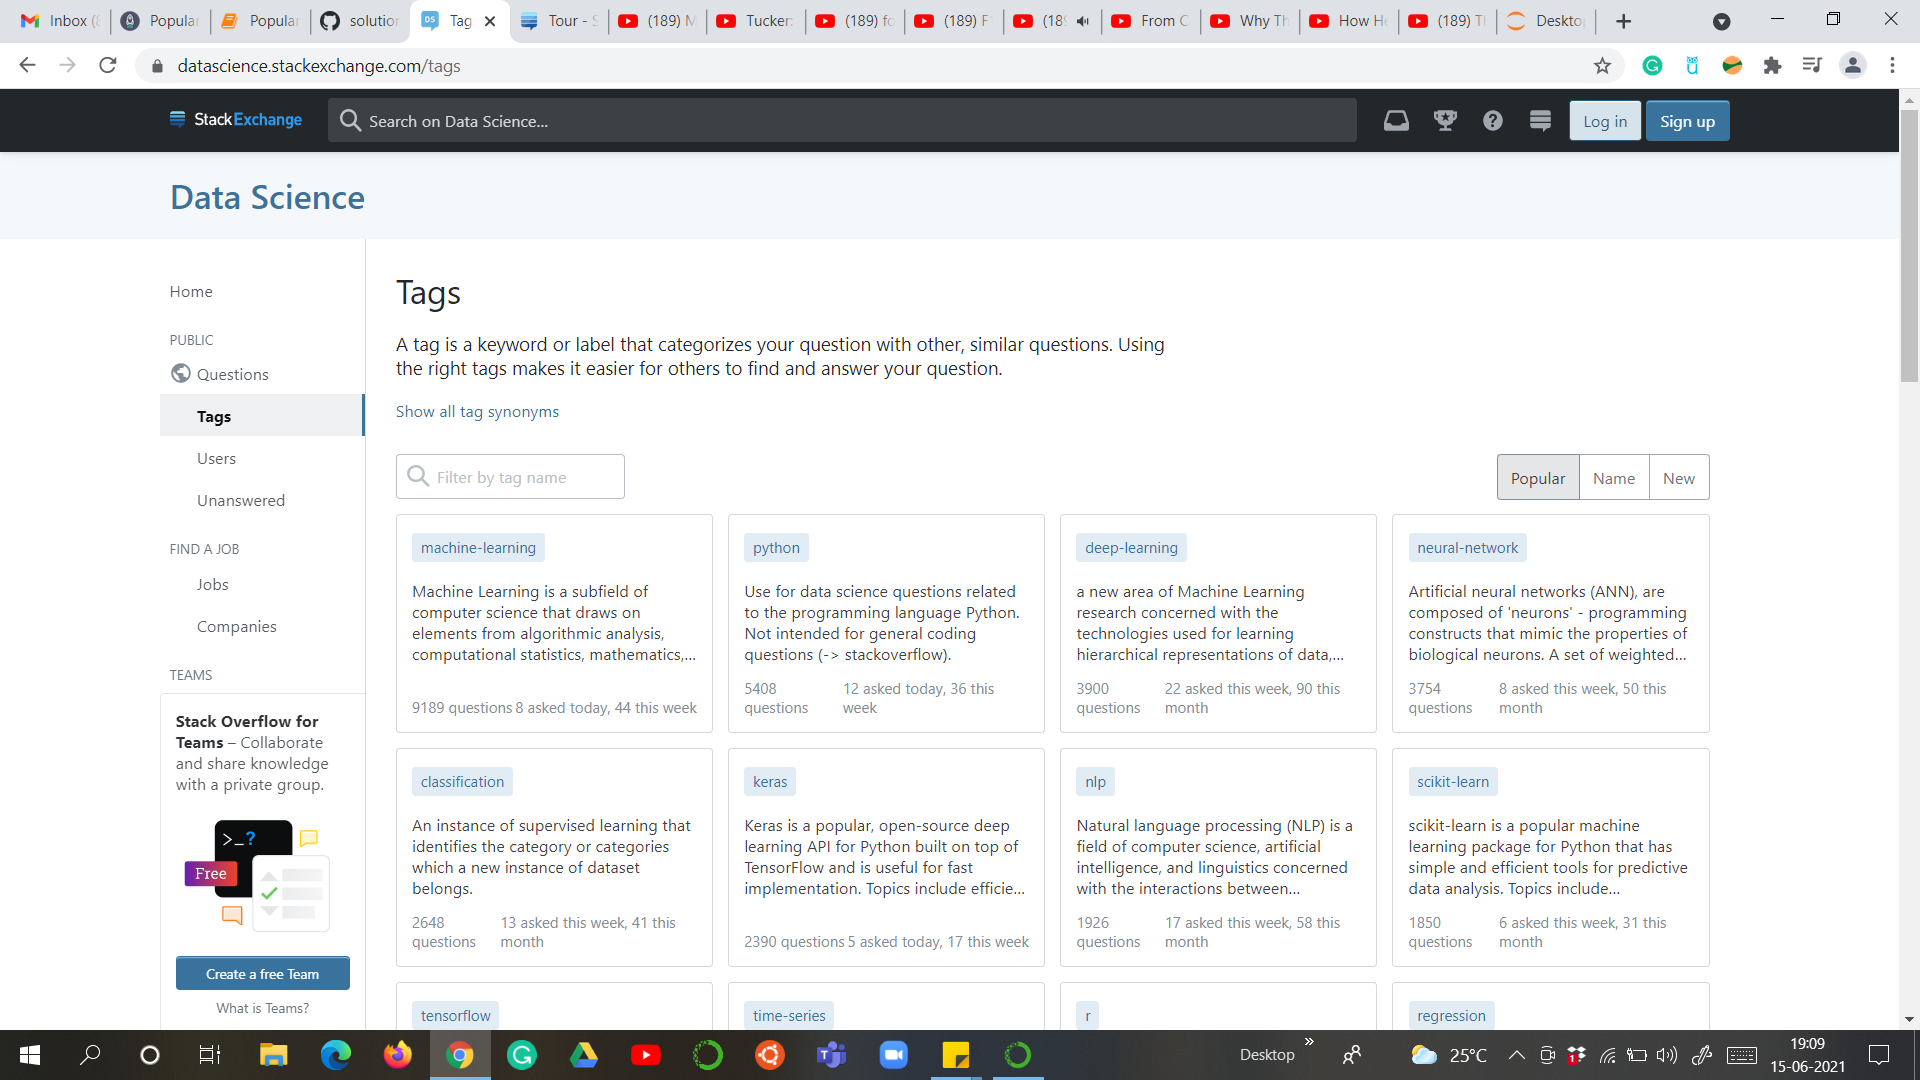
* Users — a list of users;
* Unanswered — a list of unanswered questions;

The tagging system used by Stack Exchange looks just like what we need to solve this problem as it allow us to quantify how many questions are asked about each subject.

Something else we can learn from exploring the help center, is that Stack Exchange's sites are heavily moderated by the community; this gives us some confidence in using the tagging system to derive conclusions.

__What information is available in each post?__

Some of the information we see is:
* The posts's score;
* The posts's title;
* The posts's author;
* The posts's body;

For questions only:
* The last time the question as active;
* How many times the question was viewed;
* Related questions;
* The question's tags;

## Stack Exchange Data Explorer 

Perusing the table names, a few stand out as relevant for our goal:
* Posts
* PostTags
* Tags
* TagSynonyms

Running a few exploratory queries, leads us to focus our efforts on Posts table. For examples, the Tags table looked very promising as it tells us how many times each tag was used, but there's no way to tell just from this if the interest in these tags is recent or a thing from the past.

`
SELECT TOP 10 *
FROM Tags
ORDER BY Count DESC;
`

| Id  | TagName          | Count | ExcerptPostId | WikiPostId | IsModeratorOnly | IsRequired |
|-----|------------------|-------|---------------|------------|-----------------|------------|
| 2   | machine-learning | 9173  | 4909          | 4908       |                 |            |
| 46  | python           | 5390  | 5523          | 5522       |                 |            |
| 194 | deep-learning    | 3892  | 8956          | 8955       |                 |            |
| 81  | neural-network   | 3753  | 8885          | 8884       |                 |            |
| 77  | classification   | 2644  | 4911          | 4910       |                 |            |
| 324 | keras            | 2380  | 9251          | 9250       |                 |            |
| 47  | nlp              | 1919  | 147           | 146        |                 |            |
| 128 | scikit-learn     | 1847  | 5896          | 5895       |                 |            |
| 321 | tensorflow       | 1830  | 9183          | 9182       |                 |            |
| 72  | time-series      | 1386  | 8904          | 8903       |                 |            |

## Getting the Data

The posts table has a lot of columns. We'll be focusing our attention on those that seem relevant towards our goal:

* Id: An identification number for the post.
* PostTypeId: An identification number for the type of post.
* CreationDate: The date and time of creation of the post.
* Score: The post's score.
* ViewCount: How many times the post was viewed.
* Tags: What tags were used.
* AnswerCount: How many answers the question got (only applicable to question posts).
* FavoriteCount: How many times the question was favored (only applicable to question posts).

Note that with the exception of the tags column, the last few columns contain information about how popular the post is — the kind of information we're after.

`
SELECT *
FROM PostTypes;
`

| Id | Name                |
|----|---------------------|
| 1  | Question            |
| 2  | Answer              |
| 3  | Wiki                |
| 4  | TagWikiExcerpt      |
| 5  | TagWiki             |
| 6  | ModeratorNomination |
| 7  | WikiPlaceholder     |
| 8  | PrivilegeWiki       |

There are eight different types of post. Before we try to figure out which of them are relevant to us, let's check how many of them there are:

`
SELECT PostTypeId, COUNT(*) as NrOfPosts
  FROM Posts
 GROUP BY PostTypeId;
`

| PostTypeId | NrOfPosts |
|------------|-----------|
| 6          | 11        |
| 7          | 1         |
| 1          | 29121     |
| 4          | 304       |
| 5          | 304       |
| 2          | 32673     |

Due to their low volume, anything that isn't questions or answers is mostly inconsequential. Even if it happens to be the case that such kind of posts is immensely popular, they would just be outliers and not relevant to us. We'll then just focus on the questions.

Since we're only interested in recent posts, we'll limit our analysis to the posts of 2019.

To get the relevant data we run the following query.

`
SELECT
  Id,
  PostTypeId,
  CreationDate,
  Score,
  ViewCount,
  Tags,
  AnswerCount,
  FavoriteCount
FROM Posts
WHERE PostTypeId = 1
  AND YEAR(CreationDate) = 2019;
`

Here's what the first few rows look like:

| Id    | PostTypeId | CreationDate        | Score | ViewCount | Tags                                                                           | AnswerCount | FavoriteCount |
|-------|------------|---------------------|-------|-----------|--------------------------------------------------------------------------------|-------------|---------------|
| 62294 | 1          | 2019-10-27 23:24:52 | 0     | 300       | <python><scikit-learn><logistic-regression><missing-data><dummy-variables>     | 2           | 1             |
| 62295 | 1          | 2019-10-27 23:26:22 | 1     | 32        | <data-analysis><descriptive-statistics><self-study>                            | 1           |               |
| 62296 | 1          | 2019-10-27 23:27:14 | 1     | 51        | <machine-learning><python><logistic-regression>                                | 0           |               |
| 62300 | 1          | 2019-10-28 05:01:09 | 1     | 23        | <time-series>                                                                  | 0           | 1             |
| 62302 | 1          | 2019-10-28 06:45:20 | 1     | 103       | <machine-learning><reinforcement-learning><mathematics><research>              | 0           |               |
| 62303 | 1          | 2019-10-28 07:47:14 | 4     | 4084      | <machine-learning><scikit-learn><evaluation>                                   | 1           | 4             |
| 62305 | 1          | 2019-10-28 09:30:28 | 5     | 560       | <machine-learning><optimization><genetic-algorithms>                           | 3           | 1             |
| 62306 | 1          | 2019-10-28 09:33:09 | 0     | 115       | <machine-learning><neural-network><deep-learning><cnn><machine-learning-model> | 1           |               |
| 62307 | 1          | 2019-10-28 10:14:03 | 0     | 136       | <nlp><feature-selection><feature-extraction>                                   | 1           |               |
| 62314 | 1          | 2019-10-28 11:53:29 | 2     | 56        | <scikit-learn><regression><pandas><data-science-model><mlp>                    | 1           |               |
    
Looking at the fields of each row, it stands out that FavouriteCount has missing values. 

# Exploring the Data

We can read in the data (stored in a file called `2019_questions.csv`) while immediately making sure CreationDate will be stored as a datetime object:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data_science_questions = pd.read_csv('2019_questions.csv', parse_dates=['CreationDate'])

In [3]:
data_science_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  1407 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [4]:
data_science_questions.head(10)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN
5,44430,2019-01-23 11:13:32,0,283,<fuzzy-logic>,1,NaN
6,44432,2019-01-23 11:17:46,1,214,<time-series><anomaly-detection><online-learning>,0,1.0
7,44436,2019-01-23 12:49:39,0,9,<matrix-factorisation>,0,NaN
8,44437,2019-01-23 13:04:11,0,7,<correlation><naive-bayes-classifier>,0,NaN
9,44438,2019-01-23 13:16:29,0,584,<machine-learning><python><deep-learning><kera...,1,NaN


## Number of missing values present in each column

In [5]:
data_science_questions.isnull().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7432
dtype: int64

## Fixing the missing values 

We see that only `FavoriteCount` has missing values. A missing value on this column probably means that the question was is not present in any users' favorite list, so we can replace the missing values with zero.

## Types of each column

The types seem adequate for every column, however, after we fill in the missing values on FavoriteCount, there is no reason to store the values as floats.

## Approaching how to use the Tags column

Since the object dtype is a catch-all type, let's see what types the objects in data_science_questions["Tags"] are.

In [6]:
data_science_questions["Tags"].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

We see that every value in this column is a string. On Stack Exchange, each question can only have a maximum of five tags (source), so one way to deal with this column is to create five columns in questions called Tag1, Tag2, Tag3, Tag4, and Tag5 and populate the columns with the tags in each row.

However, since it doesn't help in relating tags from one question to another, we'll just keep them as a list.

# Cleaning the Data

In [7]:
# filling the missing values and converting column to appropriate type
data_science_questions.fillna(value = {"FavoriteCount":0}, inplace=True)
data_science_questions["FavoriteCount"] = data_science_questions["FavoriteCount"].astype(int)

#converting column value into a list of values
data_science_questions["Tags"] = data_science_questions["Tags"].str.replace("^<|>$","").str.split("><")

data_science_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  8839 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(4), object(1)
memory usage: 449.0+ KB


# Most Used and Most Viewed

We now focus on determining the most popular tags. We'll do so by considering two different popularity proxies: for each tag we'll count how many times the tag was used, and how many times a question with that tag was viewed.

We could take into account the score, or whether or not a question is part of someone's favorite questions. These are all reasonable options to investigate; but we'll limit the focus of our research to counts and views for now.

In [8]:
data_science_questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0


## Most Used

In [9]:
tag_count = {}
for question_tags in data_science_questions["Tags"]:
    for tag in question_tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

For improved aesthetics, let's transform `tag_count` in a dataframe.

In [10]:
tag_count = pd.DataFrame.from_dict(tag_count,orient='index')
tag_count.rename(columns = {0 : "Count"}, inplace = True)
tag_count.head(10)

,Count
machine-learning,2693
data-mining,217
regression,347
linear-regression,175
regularization,50
python,1814
time-series,466
forecast,34
forecasting,85
scikit-learn,540


Sort the dataframe by Count in descending order and visualize for top 20:

In [11]:
top_20_tag_appearances = tag_count.sort_values('Count', ascending=False).head(20)
top_20_tag_appearances

,Count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


The threshold of 20 is somewhat arbitrary and we can experiment with others, however, popularity of the tags rapidly declines, so looking at these tags should be enough to help us with our goal. Let's visualize these data.

<AxesSubplot:>

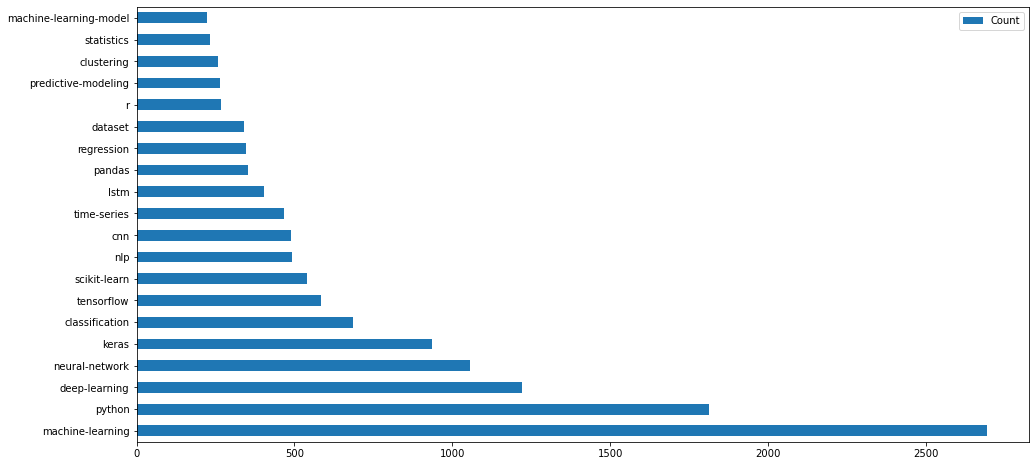

In [12]:
top_20_tag_appearances.plot.barh(y = 'Count', figsize = (16,8))

Some tags are very, very broad and are unlikely to be useful; e.g.: python, dataset, r. Before we investigate the tags a little deeper, let's repeat the same process for views.

## Most Views

In [13]:
tag_view = {}
for question_tags, question_views in zip(data_science_questions["Tags"], data_science_questions["ViewCount"]):
    for tag in question_tags:
        if tag in tag_view:
            tag_view[tag] += question_views
        else:
            tag_view[tag] = question_views

For improved aesthetics, let's transform `tag_view` in a dataframe.

In [14]:
tag_view = pd.DataFrame.from_dict(tag_view, orient='index')
tag_view.rename(columns = {0 : "Views"}, inplace = True)
tag_view.head(10)

,Views
machine-learning,388499
data-mining,31056
regression,49451
linear-regression,18978
regularization,4941
python,537585
time-series,64134
forecast,8153
forecasting,8797
scikit-learn,128110


Sort the dataframe by Views in descending order and visualize for top 20:

In [15]:
top_20_total_tag_question_views = tag_view.sort_values('Views', ascending=False).head(20)
top_20_total_tag_question_views

,Views
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787
neural-network,185367
scikit-learn,128110
tensorflow,121369
classification,104457
dataframe,89352


<AxesSubplot:>

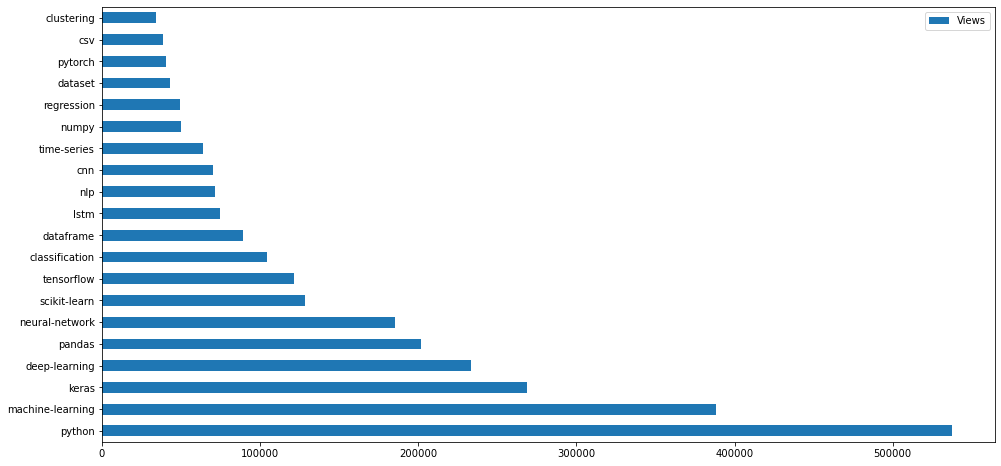

In [16]:
top_20_total_tag_question_views.plot.barh(y = 'Views', figsize = (16,8))

## Side-by-side comparison

Let's see them side by side.

array([<AxesSubplot:title={'center':'Views'}>], dtype=object)

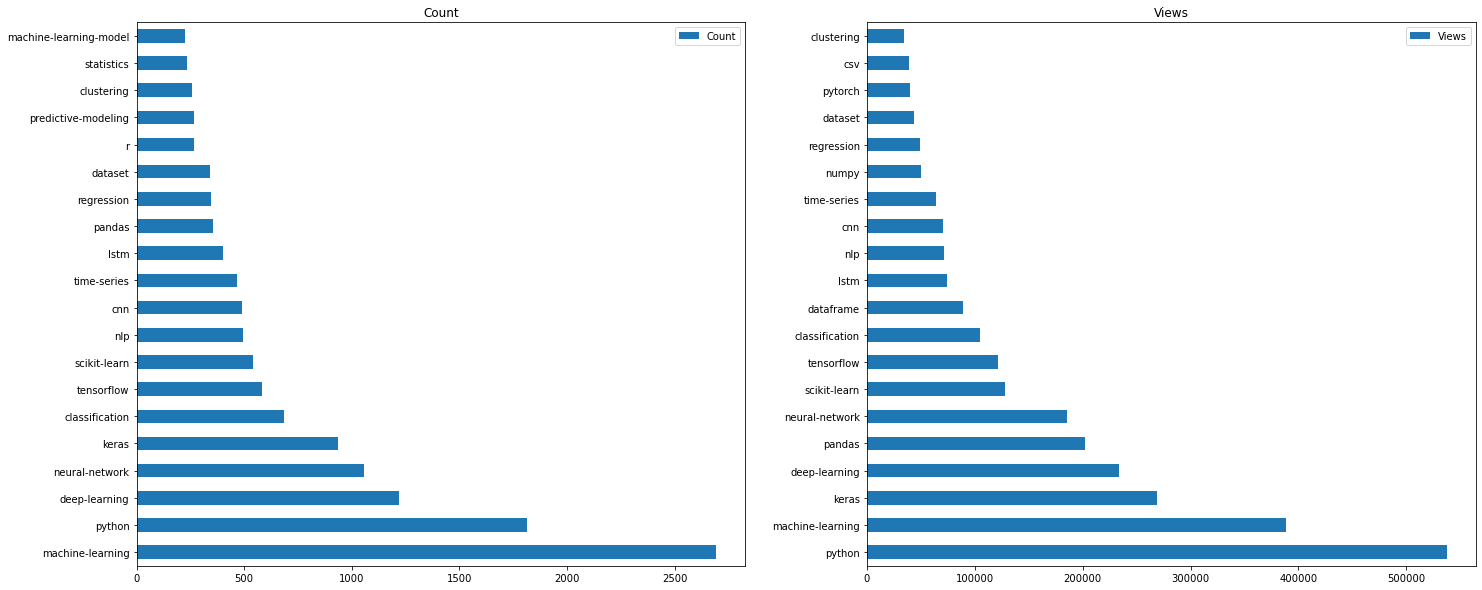

In [17]:
fig, axes = plt.subplots(1,2,figsize = (24,10))
top_20_tag_appearances.plot.barh(y='Count', ax = axes[0], subplots =True)
top_20_total_tag_question_views.plot.barh(y='Views', ax = axes[1], subplots = True)

# Relations Between Tags

Looking at the results, we see that most top tags are present in both dataframes.

Let's see what tags are in `top_20_tag_appearances`, but not in `top_20_total_tag_question_views`. We can identify them by the missing values in `Views` below.

In [18]:
tags_only_most_used = top_20_tag_appearances.merge(top_20_total_tag_question_views, how='left', left_index=True, right_index=True)
tags_only_most_used

,Count,Views
machine-learning,2693,388499.0
python,1814,537585.0
deep-learning,1220,233628.0
neural-network,1055,185367.0
keras,935,268608.0
classification,685,104457.0
tensorflow,584,121369.0
scikit-learn,540,128110.0
nlp,493,71382.0
cnn,489,70349.0


Similarly, let's see what tags are in the latter, but not the former:

In [19]:
tags_only_most_viewed = top_20_tag_appearances.merge(top_20_total_tag_question_views, how='right', left_index=True, right_index=True)
tags_only_most_viewed

,Count,Views
python,1814.0,537585
machine-learning,2693.0,388499
keras,935.0,268608
deep-learning,1220.0,233628
pandas,354.0,201787
neural-network,1055.0,185367
scikit-learn,540.0,128110
tensorflow,584.0,121369
classification,685.0,104457
dataframe,NaN,89352


The tags present in `tags_only_most_used` and not present in `tags_only_most_viewed` are:
* `r`
* `predictive-modeling`
* `statistics`
* `machine-learning-model`

The tags present in `tags_only_most_viewed` and not present in `tags_only_most_used` are:
* `dataframe`
* `numpy`
* `pytorch`
* `csv`

Some tags also stand out as being related. For example, python is related to pandas, because pandas is a Python library. 

Other pairs of tags, shouldn't be related at all, like pandas and r:

In [20]:
data_science_questions.loc[data_science_questions["Tags"].apply(lambda tags: True if "r" in tags and "pandas" in tags else False)]

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
2873,60074,2019-09-11 20:35:17,0,22,"[r, pandas, dplyr]",0,0
3651,49148,2019-04-11 19:41:39,1,83,"[r, data-mining, pandas, matlab, databases]",3,0


## Relation between pairs of tags

One way of trying to gauge how pairs of tags are related to each other, is to count how many times each pair appears together.

In [21]:
all_tags = list(tag_count.index)
all_tags

['machine-learning',
 'data-mining',
 'regression',
 'linear-regression',
 'regularization',
 'python',
 'time-series',
 'forecast',
 'forecasting',
 'scikit-learn',
 'pca',
 'dataset',
 'bigdata',
 'data',
 'speech-to-text',
 'fuzzy-logic',
 'anomaly-detection',
 'online-learning',
 'matrix-factorisation',
 'correlation',
 'naive-bayes-classifier',
 'deep-learning',
 'keras',
 'cnn',
 'theory',
 'gradient-descent',
 'nlp',
 'clustering',
 'feature-extraction',
 'encoding',
 'embeddings',
 'pandas',
 'numpy',
 'decision-trees',
 'accuracy',
 'matlab',
 'reinforcement-learning',
 'q-learning',
 'policy-gradients',
 'neural-network',
 'image-classification',
 'r',
 'logistic-regression',
 'predictive-modeling',
 'lstm',
 'tensorflow',
 'gpu',
 'data-cleaning',
 'object-detection',
 'recommender-system',
 'supervised-learning',
 'similarity',
 'text-mining',
 'word-embeddings',
 'machine-learning-model',
 'xgboost',
 'apache-spark',
 'classification',
 'gaussian',
 'deepmind',
 'training'

We'll now create a dataframe where each row will represent a tag, and each column as well. Something like this:

|      | tag1 | tag2 | tag3 |
|------|------|------|------|
| tag1 |      |      |      |
| tag2 |      |      |      |
| tag3 |      |      |      |

In [22]:
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4,0:4]

,machine-learning,data-mining,regression,linear-regression
machine-learning,NaN,NaN,NaN,NaN
data-mining,NaN,NaN,NaN,NaN
regression,NaN,NaN,NaN,NaN
linear-regression,NaN,NaN,NaN,NaN


We will now fill this dataframe with zeroes and then, for each lists of tags in questions["Tags"], we will increment the intervening tags by one. The end result will be a dataframe that for each pair of tags, it tells us how many times they were used together.

In [23]:
associations.fillna(0, inplace=True)
for tags in data_science_questions["Tags"]:
    associations.loc[tags,tags] += 1
associations

,machine-learning,data-mining,regression,linear-regression,regularization,python,time-series,forecast,forecasting,scikit-learn,...,haar-cascade,gru,pattern-recognition,text-classification,parquet,encoder,label-smoothing,label-flipping,3d-object-detection,kitti-dataset
machine-learning,2693,95,119,68,20,499,131,9,29,188,...,0,0,1,0,0,0,0,0,0,0
data-mining,95,217,3,1,0,27,11,0,0,2,...,0,0,0,0,0,0,0,0,0,0
regression,119,3,347,35,2,59,24,1,6,37,...,0,0,0,0,0,0,0,0,0,0
linear-regression,68,1,35,175,1,30,10,1,2,27,...,0,0,0,0,0,0,0,0,0,0
regularization,20,0,2,1,50,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
encoder,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
label-smoothing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
label-flipping,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3d-object-detection,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


This dataframe is quite large. Let's focus our attention on the most used tags.

In [24]:
associations_between_most_used_tags = associations.loc[top_20_tag_appearances.index,top_20_tag_appearances.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

associations_between_most_used_tags.style.apply(style_cells, axis=None)

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model
machine-learning,2693,499,429,366,195,259,106,188,113,124,131,71,62,119,99,63,123,61,89,139
python,499,1814,160,137,280,98,167,235,71,62,105,61,244,59,53,24,35,45,35,37
deep-learning,429,160,1220,305,247,59,136,16,72,160,44,103,1,21,32,5,32,2,12,19
neural-network,366,137,305,1055,235,65,108,24,24,118,33,69,1,42,20,9,13,8,11,10
keras,195,280,247,235,935,58,256,34,23,116,51,133,3,31,13,10,11,0,3,17
classification,259,98,59,65,58,685,20,47,35,20,25,20,3,34,28,10,27,12,19,21
tensorflow,106,167,136,108,256,20,584,15,11,57,9,43,3,9,9,1,6,0,0,9
scikit-learn,188,235,16,24,34,47,15,540,12,0,12,2,37,37,9,1,12,24,6,18
nlp,113,71,72,24,23,35,11,12,493,7,0,19,3,2,11,4,1,9,3,4
cnn,124,62,160,118,116,20,57,0,7,489,8,24,1,6,11,2,6,0,1,4


The cells highlighted in yellow tell us that time-series was used together with r 22 times. The values in blue tell us how many times each of the tags was used. We saw earlier that machine-learning was used 2693 times and we confirm it in this dataframe.

It's hard for a human to understand what is going on in this dataframe. Let's create a heatmap. But before we do it, let's get rid of the values in blue, otherwise the colors will be too skewed.

In [25]:
for i in range(associations_between_most_used_tags.shape[0]):
    associations_between_most_used_tags.iloc[i,i] = np.nan

<AxesSubplot:>

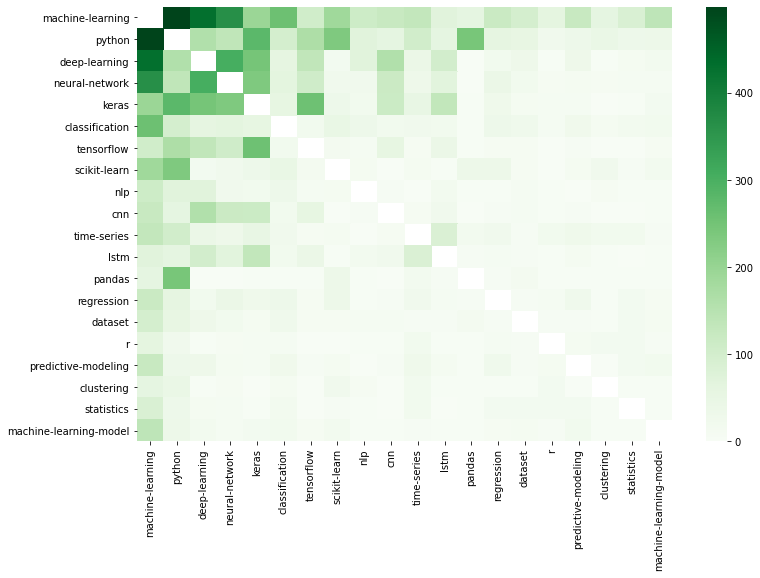

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(associations_between_most_used_tags, cmap="Greens", annot=False)

The most used tags also seem to have the strongest relationships, as given by the dark concentration in the top left corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them.

A more intuitive manifestation of this phenomenon is the following. A lot of people buy bread, a lot of people buy toilet paper, so they end up being purchased together a lot, but purchasing one of them doesn't increase the chances of purchasing the other.

Another shortcoming of this attempt is that it only looks at relations between pairs of tags and not between multiple groups of tags. For example, it could be the case that when used together, `dataset` and `scikit-learn` have a "strong" relation to `pandas`, but each by itself doesn't.

So how do we attack both these problems? There is a powerful data mining technique that allows us to handle this: association rules. Association rules allow us to analytically spot relations like "people who purchase milk, also purchase eggs". Moreover, we can also measure how strong these relations are on several fronts: 
* how common the relation is, 
* how strong it is, 
* and how independent the components of the relationship are (toilet paper and bread are probably more independent than eggs and milk)

# Using Domain Knowledge

From the top 10 tags of each, here's a list of the tags in common: `python`, `machine-learning`, `deep-learning`, `neural-network`, `keras`, `tensorflow`, `classification`, `scikit-learn`.

Keras, scikit-learn, TensorFlow are all Python libraries that allow their users to employ deep learning (a type of neural network).

Most of the top tags are all intimately related with one central machine learning theme: deep learning. If we want to be very specific, we can suggest the creation of Python content that uses deep learning for classification problems (and other variations of this suggestion).

At the glance of an eye, someone with sufficient domain knowledge can tell that the most popular topic at the moment, as shown by our analysis, is deep learning.

# Just a Fad?

Before we officially make our recommendation, it would be nice to solidify our findings with additional proof. More specifically, one thing that comes to mind is "Is deep learning just a fad?" Ideally, the content we decide to create will be the most useful for as long as possible. Could interest in deep learning be slowing down? 

The file `all_questions.csv` holds the result of the query below — this query fetches all of the questions ever asked on DSSE, their dates and tags.

`
SELECT
  Id,
  CreationDate,
  Tags
FROM Posts
WHERE PostTypeId = 1;
`

In this we will track the interest in deep learning across time. We will:

* Count how many deep learning questions are asked per time period.
* The total amount of questions per time period.
* How many deep learning questions there are relative to the total amount of questions per time period.

In [27]:
all_data_science_questions = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])
all_data_science_questions["Tags"] = all_data_science_questions["Tags"].str.replace("^<|>$","").str.split("><")
all_data_science_questions

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."
...,...,...,...
21571,36971,2018-08-15 14:19:01,"[statistics, data]"
21572,36974,2018-08-15 14:40:27,"[machine-learning, neural-network, classifier]"
21573,36975,2018-08-15 14:53:43,"[machine-learning, classification]"
21574,36979,2018-08-14 19:31:43,"[tensorflow, python]"


Before deciding which questions should be classified as being deep learning questions, we should decide what tags are deep learning tags.

The definition of what constitutes a deep learning tag we'll use is: a tag that belongs to the list ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].

This list was obtained by looking at all the tags in most_used and seeing which ones had any relation to deep learning.

In [28]:
deep_learning_tags = ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]

def deep_learning_question_classifier(tags):
    for tag in tags:
        if tag in deep_learning_tags:
            return 1
    return 0

all_data_science_questions["deep_learning_class"] = all_data_science_questions["Tags"].apply(deep_learning_question_classifier)

all_data_science_questions

,Id,CreationDate,Tags,deep_learning_class
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0
...,...,...,...,...
21571,36971,2018-08-15 14:19:01,"[statistics, data]",0
21572,36974,2018-08-15 14:40:27,"[machine-learning, neural-network, classifier]",1
21573,36975,2018-08-15 14:53:43,"[machine-learning, classification]",0
21574,36979,2018-08-14 19:31:43,"[tensorflow, python]",1


The data-science-techonology landscape isn't something as dynamic to merit daily, weekly, or even monthly tracking. Let's track it quarterly.

Since we don't have all the data for the first quarter of 2020, we'll get rid of those dates:

In [29]:
all_data_science_questions = all_data_science_questions[all_data_science_questions["CreationDate"].dt.year < 2020]
all_data_science_questions.sort_values('CreationDate', ascending = False)

,Id,CreationDate,Tags,deep_learning_class
20303,65671,2019-12-31 18:08:12,"[deep-learning, hyperparameter, hyperparameter...",1
20302,65667,2019-12-31 16:08:06,[bayesian],0
20301,65666,2019-12-31 14:59:18,"[scikit-learn, cross-validation, ml]",1
20300,65664,2019-12-31 14:15:54,"[neural-network, deep-learning, classification...",1
20299,65663,2019-12-31 13:25:01,[information-retrieval],0
...,...,...,...,...
69,16,2014-05-14 01:57:56,"[machine-learning, bigdata, libsvm]",0
68,15,2014-05-14 01:41:23,[databases],0
67,14,2014-05-14 01:25:59,"[data-mining, definitions]",0
66,7,2014-05-14 00:11:06,"[education, open-source]",0


In [30]:
def quarter_classifier(datetime):
    short_year = str(datetime.year)[-2:]
    month = datetime.month
    quarter=''
    if month <= 3:
        quarter = "Q1"
    elif month <= 6:
        quarter = "Q2"
    elif month <= 9:
        quarter = "Q3"
    else:
        quarter = "Q4"
    return short_year+quarter

all_data_science_questions["YearQuarter"] = all_data_science_questions["CreationDate"].apply(quarter_classifier)
all_data_science_questions

<ipython-input-30-f40fd75ffaae>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_science_questions["YearQuarter"] = all_data_science_questions["CreationDate"].apply(quarter_classifier)


,Id,CreationDate,Tags,deep_learning_class,YearQuarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19Q1
3,45426,2019-02-12 04:51:49,[keras],1,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19Q1
...,...,...,...,...,...
21571,36971,2018-08-15 14:19:01,"[statistics, data]",0,18Q3
21572,36974,2018-08-15 14:40:27,"[machine-learning, neural-network, classifier]",1,18Q3
21573,36975,2018-08-15 14:53:43,"[machine-learning, classification]",0,18Q3
21574,36979,2018-08-14 19:31:43,"[tensorflow, python]",1,18Q3


In [31]:
deep_learning_interest = all_data_science_questions.groupby('YearQuarter').agg({"deep_learning_class":[np.sum,np.size]})
deep_learning_interest.columns=["Number_of_deep_learning_questions_asked","Total_questions_asked"]
deep_learning_interest["Proportion of deep learning questions(in %)"] = (deep_learning_interest["Number_of_deep_learning_questions_asked"] / deep_learning_interest["Total_questions_asked"])*100
deep_learning_interest.reset_index(inplace=True)
deep_learning_interest

,YearQuarter,Number_of_deep_learning_questions_asked,Total_questions_asked,Proportion of deep learning questions(in %)
0,14Q2,9,157,5.732484
1,14Q3,13,189,6.878307
2,14Q4,21,216,9.722222
3,15Q1,18,190,9.473684
4,15Q2,28,284,9.859155
5,15Q3,45,311,14.469453
6,15Q4,66,382,17.277487
7,16Q1,110,516,21.317829
8,16Q2,109,518,21.042471
9,16Q3,161,585,27.521368


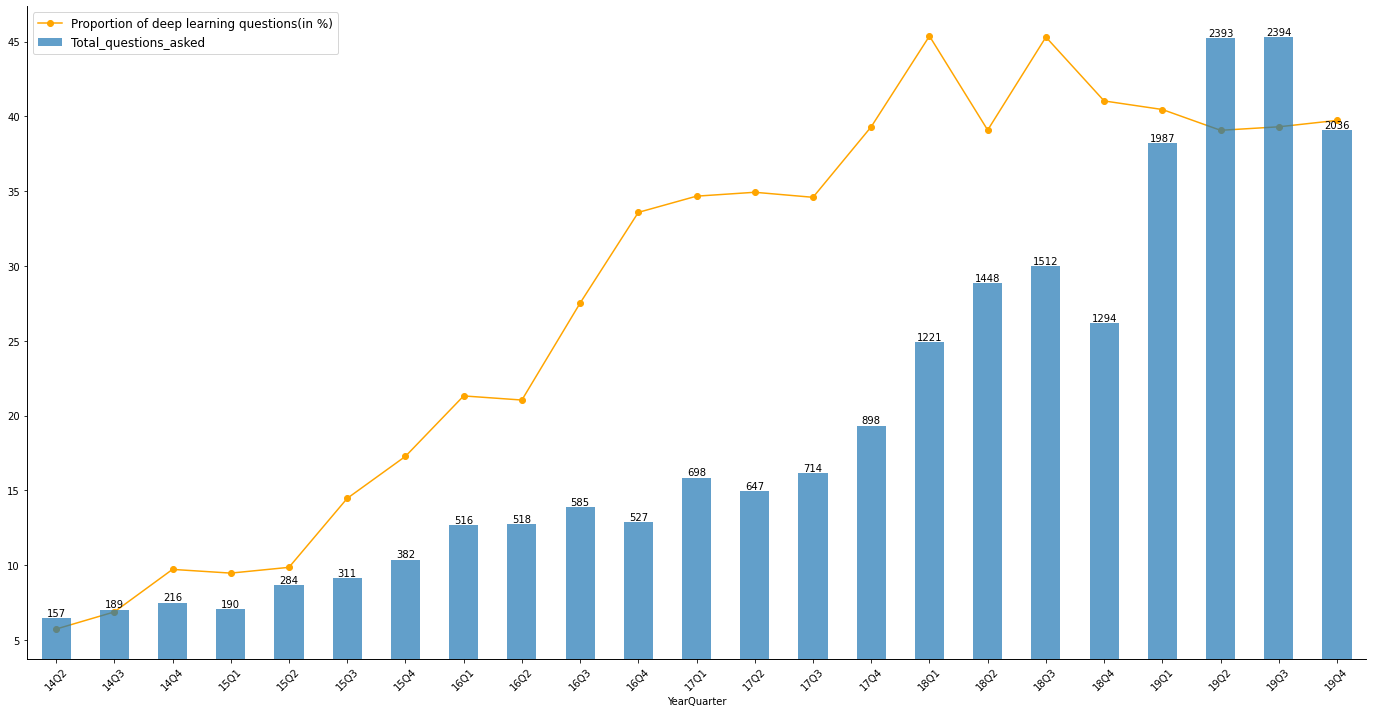

In [32]:
ax1 = deep_learning_interest.plot.line(x='YearQuarter',y='Proportion of deep learning questions(in %)',linestyle="-", marker="o", color="orange",
                    figsize=(24,12))

ax2 = deep_learning_interest.plot.bar(x='YearQuarter',y='Total_questions_asked',ax=ax1,secondary_y=True,alpha=0.7,rot=45)

for idx,t in deep_learning_interest["Total_questions_asked"].iteritems():
    ax2.text(idx,t,str(t),ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

It seems that deep learning questions was a high-growth trend since the start of DSSE and it looks like it is plateauing. There is no evidence to suggest that interest in deep learning is decreasing and so we maintain our previous idea of proposing that we create deep learning content.